In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl  
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
from emoji import UNICODE_EMOJI

Hipóteses

\begin{equation*}
   H_0:\mbox{Tem poucas meninas na engenharia por motivos externos} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_a:\mbox{Tem poucas meninas na engenharia por motivos internos} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}


Motivos externos: Mercado de trabalho, Salário, Vontade de outros
    
Motivos internos: Gosto por exatas/ curso

# 1a Análise: Faz ou não engenharia no Insper?

### Ler Arquivos Excel e colocar em um DataFrame

## PRIMEIRO SHEET : meninas na engenharia insper

Lendo arquivo Excel

In [2]:
eng_insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

Limpar o DataFrame e Renomear algumas colunas

In [3]:
eng_insper = eng_insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Insper foi sua 1a opcao?': 'Sua atual faculdade foi sua 1a opção?', 'Como descobriu o Insper?':'Como descobriu sua faculdade?', 'Por que Insper?': 'Por que escolheu sua faculdade?'})


semestre=[]

for k in eng_insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper.SEMESTRE = semestre


eng_insper['Se "Não", qual?'] = eng_insper['Se "Não", qual?'].fillna('Insper')

eng_insper['Se SIM na pergunta anterior,  quais familiares?'] = eng_insper['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')

In [4]:
eng_insper['Fez Insper?']='Sim'


In [5]:
eng_insper_idx=eng_insper.set_index('NOME')

## SEGUNDO SHEET: engenharia de outras faculdades

Lendo arquivo Excel

In [6]:
eng_geral = pd.read_excel('PESQUISA.xlsx', sheet_name = 1)


Limpar o DataFrame e Renomear algumas colunas

In [7]:
eng_geral = eng_geral.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM"})


eng_geral['Se SIM na pergunta anterior,  quais familiares?'] = eng_geral['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')


eng_geral['Se "Não", qual?'] = eng_geral['Se "Não", qual?'].fillna('A atual')


semestre=[]

for k in eng_geral.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_geral.SEMESTRE = semestre

In [8]:
eng_geral = eng_geral.drop('Distância da faculdade de casa...', 1)

In [9]:
eng_geral['Fez Insper?']='Não'


In [10]:
eng_geral_idx=eng_geral.set_index('NOME')

* Juntando os DataFrames

In [11]:
eng_geral.shape

(90, 20)

In [12]:
len(eng_insper_idx)

30

In [13]:
len(eng_geral_idx)

90

In [17]:
len(pd.concat([eng_insper_idx, eng_geral_idx]))

120

In [18]:
eng = pd.concat([eng_insper_idx, eng_geral_idx])
eng

,IDADE,SEMESTRE,TIPO_ENG,ESTADO/CID,TIPO_EM,NOME_EM,Algum familiar trabalha na área de engenharia?,"Se SIM na pergunta anterior, quais familiares?",Engenharia foi sua 1a escolha?,Por que escolheu Engenharia?,Sua atual faculdade foi sua 1a opção?,"Se ""Não"", qual?",Como descobriu sua faculdade?,Por que escolheu sua faculdade?,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Fez Insper?
NOME,,,,,,,,,,,,,,,,,,,
Vitória de Almeida Oliveira,Entre 19 a 21 anos,2,Engenharia Mecatrônica,osasco/são paulo,Escola Privada,Coc Sapiens,Não,Ninguém,Sim,Gosta de Exatas,Sim,Insper,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 15000 - R$ 20000,Entre 62 a 65 anos,Não,Sim
manuela castilla,Entre 16 a 18 anos,2,Engenharia Mecatrônica,são paulo são paulo,Escola Privada,Escola da vila,Sim,Pai e tio,Não,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
Mariana Sophia Abrantes,Entre 19 a 21 anos,2,Engenharia Mecânica,Sao Paulo/Sao Paulo,Escola Privada,Colégio Dante Alighieri,Sim,Pai e mãe,Sim,"Gosta de Exatas, Desde de criança brinca com e...",Não,Instituto Mauá de Tecnologia,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
Maria Clara Luques,Entre 19 a 21 anos,8,Engenharia Mecatrônica,Barueri/SP,Escola Privada,Pueri Domus,Sim,"Pai, padrasto e irmão",Sim,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Não,Sim
Beatriz Alexandre,Entre 16 a 18 anos,2,Engenharia Mecânica,São Paulo - SP,Escola Privada,Porto Seguro,Sim,Mãe e Pai,Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Sim
Beatriz Mie,Entre 19 a 21 anos,2,Engenharia da Computação,São Bernardo do Campo - São Paulo,Escola Privada,Colégio Harmonia,Sim,Primas,Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Não,UFABC,Por amigos,Reconhecimento no mercado devido aos outros cu...,Não,R$ 10000 - R$ 15000,Entre 65 a 70 anos,Sim,Sim
Roberta Thome,Entre 19 a 21 anos,2,Engenharia Mecatrônica,Sp,Escola Privada,Dante Alighieri,Sim,Meu pai,Não,Gosta de Exatas,Não,Unicamp,"Por amigos, Por família","Infraestrutura, Ensino diferenciado, Oportunid...",Sim,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
Rachel Maria,Entre 19 a 21 anos,8,Engenharia Mecânica,São Paulo SP,Escola Privada,Porto Seguro,Não,Ninguém,Não,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,Insper,Feira de Universidades/ Faculdades,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Não,Sim
Luiza Rodrigues silveira,Entre 19 a 21 anos,2,Engenharia da Computação,Uberlândia/Mg,Escola Privada,Nacional,Não,Ninguém,Sim,Gosta de Exatas,Não,UFU,Internet,"Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Sim


Text(0.5,1,'se tem familiares na engenharia')

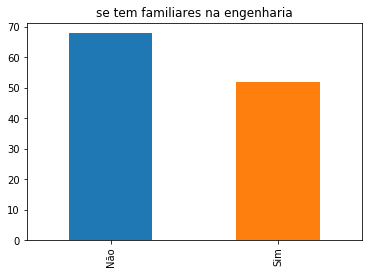

In [19]:
eng["Algum familiar trabalha na área de engenharia?"].value_counts().plot.bar()
plt.title("se tem familiares na engenharia")

Text(0.5,1,'Qual tipo de engenharia')

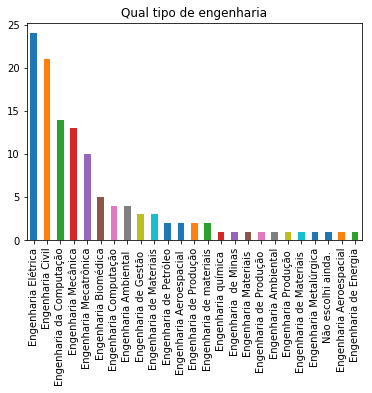

In [20]:
eng["TIPO_ENG"].value_counts().plot.bar()
plt.title("Qual tipo de engenharia")

Limpeza da Coluna de quais familiares na engenharia

In [58]:
mae = 0
maeL =[]

avos = 0
avosL =[]

pai = 0
paiL =[]

tio = 0
tioL=[]

irmaos =0
irmaosL =[]

ninguem = 0
ninguemL =[]

padrasto = 0
padrastoL=[]

primos = 0
primosL=[]

for k in eng['Se SIM na pergunta anterior,  quais familiares?']:
    split_v = k.split(",")
    for i in split_v:
        split_e = i.split(" e")
    
    for k in split_e:
        if k == "pai" or k =="Pai" or k == "Meu pai" or k =="pai e mãe ":
            pai+=1
            paiL.append("pai")
        elif k == " mãe " or k == "Mãe" or k == "pai e mãe ":
            mae+=1
            maeL.append("mae")
        elif k =="irmã " or k ==" meu irmão" or k ==" irmão" :
            irmaos+=1
            irmaosL.append("irmao")
        elif k ==" tio." or k ==" tios" or k =="Tios" or k ==" tio":
            tio+=1
            tioL.append("tio")
        elif "padrasto" in k.lower():
            padrasto+=1
            padrastoL.append("padrasto")
        elif "ninguém" in k.lower():
            ninguem+=1
            ninguemL.append("ninguem")
        elif "avô" in k.lower() or k==" avô":
            avos+=1
            avosL.append("avos")
        elif k ==" primos" or k =='Primo' or k==' primas' or k==" primo" or k==' primos ' or k=="Dois primos":
            primos +=1
            primosL.append("primos")
    


Text(0.5,1,'Familiares na Engenharia')

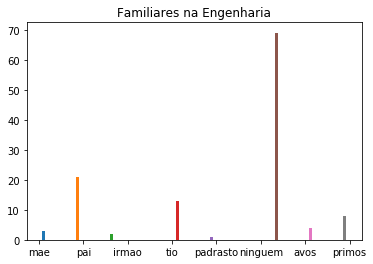

In [59]:
familia =[]
familia.append(maeL)
familia.append(paiL)
familia.append(irmaosL)
familia.append(tioL)
familia.append(padrastoL)
familia.append(ninguemL)
familia.append(avosL)
familia.append(primosL)
plt.hist(familia);
plt.title('Familiares na Engenharia')

Text(0.5,1,'Estuda no Insper')

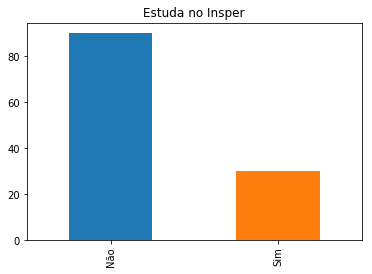

In [51]:
eng["Fez Insper?"].value_counts().plot.bar()
plt.title("Estuda no Insper")

#  2a Análise: Faz Engenharia ou Adm/Eco no Insper?

# PRIMEIRO SHEET: meninas na engenharia Insper

In [39]:
# leitura do excel
eng_insper_2 = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

In [75]:
#renomeando colunas:
eng_insper_2 = eng_insper_2.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM",  'Algum familiar trabalha na área de engenharia?':'Familiar na área?',  'Se SIM na pergunta anterior,  quais familiares?':'Quais familiares?', 'Engenharia foi sua 1a escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Engenharia?':'Por que escolheu este curso ?'})

#limpeza e modificações
semestre=[]

for k in eng_insper_2.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper_2.SEMESTRE = semestre

eng_insper_2['Se "Não", qual?'] = eng_insper_2['Se "Não", qual?'].fillna('Insper')

eng_insper_2['Faz Engenharia?']= 'Sim'

eng_insper_2['Quais familiares?'] = eng_insper_2['Quais familiares?'].fillna('Ninguém')


In [76]:
eng_insper_2_idx=eng_insper_2.set_index('NOME')

## QUARTO SHEET: adm/econo insper


Lendo arquivo Excel

In [77]:
insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 3)

Limpar o DataFrame e Renomear algumas colunas

In [66]:
insper['Se "Não", qual?'] = insper['Se "Não", qual?'].fillna('Insper')
insper = insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual curso?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Algum familiar trabalha na área de adm e/ou econo?': 'Familiar na área?', 'Se SIM na pergunta anterior, quais familiares?':'Quais Familiares?', 'Adm e/ou Econo foi sua primeira escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Administração/ Economia?': 'Por que escolheu este curso?'})
semestre=[]

for k in insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
insper.SEMESTRE = semestre

insper.columns.tolist()


['NOME',
 'IDADE',
 'SEMESTRE',
 'Curso',
 'ESTADO/CID',
 'Qual é a distância da sua casa para a faculdade',
 'TIPO_EM',
 'NOME_EM',
 'Familiar na área?',
 'Se SIM na pergunta anterior,  quais familiares?',
 'Seu curso foi sua 1a escolha?',
 'Por que escolheu este curso?',
 'Insper foi sua 1a opcao?',
 'Se "Não", qual?',
 'Como descobriu o Insper?',
 'Por que Insper?',
 'Ter poucas meninas no Insper te desmotiva a ingressar na instituição?',
 'Quanto você espera ganhar no seu início de sua carreira?',
 'Com quantos anos você espera se aposentar?',
 'Você pretende ter filhos?']

In [67]:
insper_idx=insper.set_index('NOME')

In [62]:
insper_idx.columns.tolist()

['IDADE',
 'SEMESTRE',
 'Curso',
 'ESTADO/CID',
 'Qual é a distância da sua casa para a faculdade',
 'TIPO_EM',
 'NOME_EM',
 'Familiar na área?',
 'Se SIM na pergunta anterior,  quais familiares?',
 'Seu curso foi sua 1a escolha?',
 'Por que escolheu Administração/ Economia?',
 'Insper foi sua 1a opcao?',
 'Se "Não", qual?',
 'Como descobriu o Insper?',
 'Por que Insper?',
 'Ter poucas meninas no Insper te desmotiva a ingressar na instituição?',
 'Quanto você espera ganhar no seu início de sua carreira?',
 'Com quantos anos você espera se aposentar?',
 'Você pretende ter filhos?',
 'Faz Engenharia?']

In [68]:
insper_idx['Faz Engenharia?']='Não'

##### Juntando os DataFrames

In [78]:
#Conferir o número de colunas em cada DataFrame
print(len(eng_insper_2.columns.tolist()))
print(len(insper_idx.columns.tolist()))

20
20


In [79]:
Insper=pd.concat([eng_insper_2, insper_idx], sort=False)
Insper.head(1)

,NOME,IDADE,SEMESTRE,Curso,ESTADO/CID,TIPO_EM,NOME_EM,Familiar na área?,Quais familiares?,Seu curso foi sua 1a escolha?,...,Como descobriu o Insper?,Por que Insper?,Ter poucas meninas no Insper te desmotiva a ingressar na instituição?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Faz Engenharia?,Qual é a distância da sua casa para a faculdade,"Se SIM na pergunta anterior, quais familiares?",Por que escolheu este curso?
0,Vitória de Almeida Oliveira,Entre 19 a 21 anos,8,Engenharia Mecatrônica,osasco/são paulo,Escola Privada,Coc Sapiens,Não,Ninguém,Sim,...,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 15000 - R$ 20000,Entre 62 a 65 anos,Não,Sim,NaN,NaN,NaN


###  Análise explorátoria 2.0

Text(0.5,1,'se tem familiares na área')

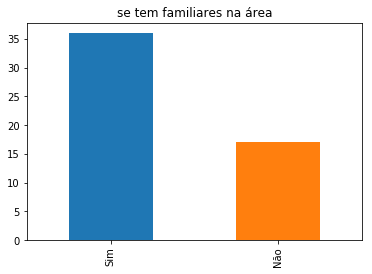

In [82]:
Insper["Familiar na área?"].value_counts().plot.bar()
plt.title("se tem familiares na área")

Text(0.5,1,'Qual tipo de curso?')

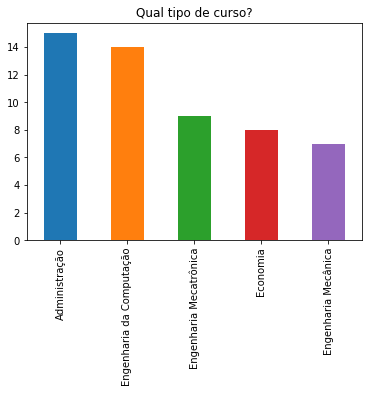

In [85]:
Insper['Curso'].value_counts().plot.bar()
plt.title("Qual tipo de curso?")

In [65]:
mae = 0
maeL =[]

avos = 0
avosL =[]

pai = 0
paiL =[]

tio = 0
tioL=[]

irmaos =0
irmaosL =[]

ninguem = 0
ninguemL =[]

padrasto = 0
padrastoL=[]

primos = 0
primosL=[]

for k in eng['Se SIM na pergunta anterior,  quais familiares?']:
    split_v = k.split(",")
    for i in split_v:
        split_e = i.split(" e")
    for k in split_e:
        if k == "pai" or k =="Pai" or k == "Meu pai" or k =="pai e mãe ":
            pai+=1
            paiL.append("pai")
        elif k == " mãe " or k == "Mãe" or k == "pai e mãe ":
            mae+=1
            maeL.append("mae")
        elif k =="irmã " or k ==" meu irmão" or k ==" irmão" :
            irmaos+=1
            irmaosL.append("irmao")
        elif k ==" tio." or k ==" tios" or k =="Tios" or k ==" tio":
            tio+=1
            tioL.append("tio")
        elif "padrasto" in k.lower():
            padrasto+=1
            padrastoL.append("padrasto")
        elif "ninguém" in k.lower():
            ninguem+=1
            ninguemL.append("ninguem")
        elif "avô" in k.lower() or k==" avô":
            avos+=1
            avosL.append("avos")
        elif k ==" primos" or k =='Primo' or k==' primas' or k==" primo" or k==' primos ' or k=="Dois primos":
            primos +=1
            primosL.append("primos")
    

Text(0.5,1,'Familiares na Engenharia')

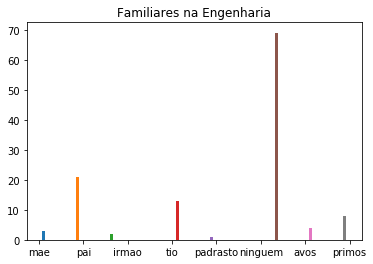

In [64]:
familia =[]
familia.append(maeL)
familia.append(paiL)
familia.append(irmaosL)
familia.append(tioL)
familia.append(padrastoL)
familia.append(ninguemL)
familia.append(avosL)
familia.append(primosL)
plt.hist(familia);
plt.title('Familiares na Engenharia')

# Bibliografia:

* pd.concat:
https://stackoverflow.com/questions/21435176/appending-two-dataframes-with-same-columns-different-order